Standar Packeges

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [28]:
import os
import pandas as pd

folder_path = r'C:\Users\swa21001\Desktop\Testdata\Testdata'
file_path = os.path.join(folder_path, 'testJ2.csv')

emg_data = pd.read_csv(file_path, comment='#')
print(emg_data.head())
print("Files in folder:", os.listdir(folder_path))
for f in os.listdir(folder_path):
    print(f"'{f}'")
emg_data.columns = ['time', 'signal']

   Time (s)    C2 (V)
0   20.0000  1.632489
1   19.9998  1.632489
2   19.9996  1.632489
3   19.9994  1.632489
4   19.9992  1.628811
Files in folder: ['testJ.csv', 'testJ2.csv', 'testJ3.csv', 'testJ4.csv', 'testP2.csv', 'testP3.csv', 'testP4.csv', 'testP5.csv']
'testJ.csv'
'testJ2.csv'
'testJ3.csv'
'testJ4.csv'
'testP2.csv'
'testP3.csv'
'testP4.csv'
'testP5.csv'


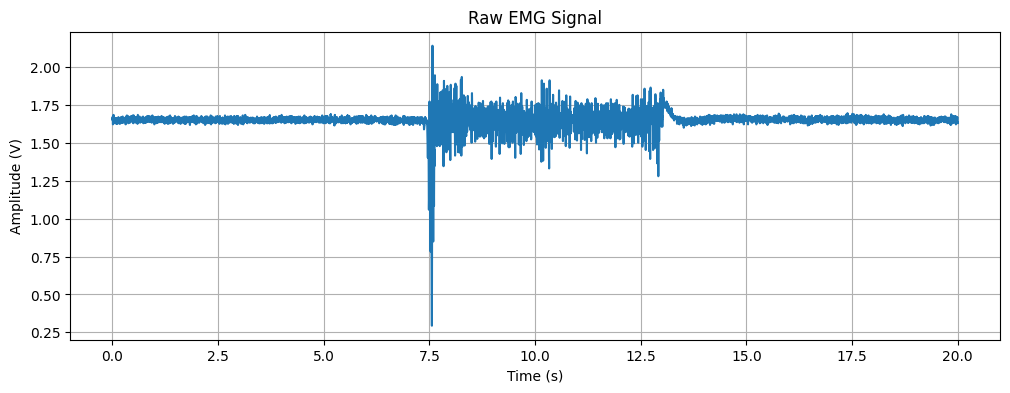

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(emg_data['time'], emg_data['signal'])
plt.title('Raw EMG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.show()

Import required libraries

In [30]:
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

 Define the bandpass filter function

In [31]:
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

In [32]:
fs = 1000  # Sampling frequency in Hz

# Apply filter to the 'signal' column
emg_data['filtered'] = bandpass_filter(emg_data['signal'], lowcut=20, highcut=150, fs=fs)

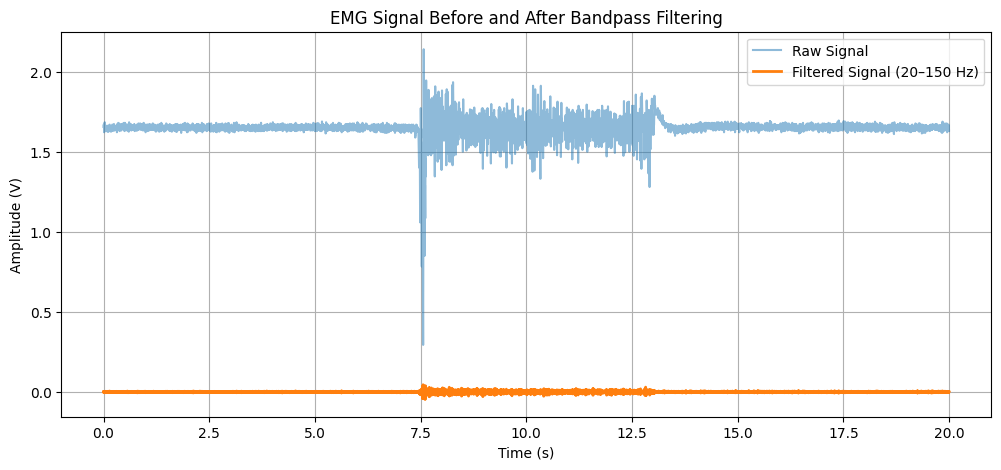

In [33]:
plt.figure(figsize=(12, 5))
plt.plot(emg_data['time'], emg_data['signal'], label='Raw Signal', alpha=0.5)
plt.plot(emg_data['time'], emg_data['filtered'], label='Filtered Signal (20–150 Hz)', linewidth=2)
plt.title('EMG Signal Before and After Bandpass Filtering')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.legend()
plt.grid(True)
plt.show()

Define the windowing function

In [34]:
import numpy as np

def segment_signal(signal, window_size, step_size):
    segments = []
    for start in range(0, len(signal) - window_size + 1, step_size):
        segment = signal[start:start + window_size]
        segments.append(segment)
    return np.array(segments)

Apply it to the filtered signal

In [35]:
window_size = int(0.2 * fs)    # 200 ms = 200 samples
step_size = int(0.05 * fs)     # 50 ms = 50 samples (25% overlap)

windows = segment_signal(emg_data['filtered'].values, window_size, step_size)

print(f"Segmented into {len(windows)} windows, each of shape {windows[0].shape}")

Segmented into 1997 windows, each of shape (200,)


Define the preprocessing function

In [36]:
def preprocess_emg_window(window):
    # Step 1: Zero-mean
    window = window - np.mean(window)

    # Step 2: Absolute value
    window = np.abs(window)

    # Step 3: Moving average with window size 20
    smoothed = np.convolve(window, np.ones(20)/20, mode='same')

    # Step 4: Normalize to [0, 1]
    min_val = np.min(smoothed)
    max_val = np.max(smoothed)
    normalized = (smoothed - min_val) / (max_val - min_val + 1e-8)

    return normalized

Apply to all windows

In [37]:
preprocessed_windows = np.array([preprocess_emg_window(w) for w in windows])
print("Preprocessed windows shape:", preprocessed_windows.shape)

Preprocessed windows shape: (1997, 200)


In [38]:
import matplotlib.pyplot as plt
import numpy as np
raw_window = windows[0]
# Step 1: Zero-mean
zero_mean = raw_window - np.mean(raw_window)

# Step 2: Absolute value
abs_window = np.abs(zero_mean)

# Step 3: Moving average with window size 20
smoothed = np.convolve(abs_window, np.ones(20)/20, mode='same')

# Step 4: Normalize to [0, 1]
normalized = (smoothed - np.min(smoothed)) / (np.max(smoothed) - np.min(smoothed) + 1e-8)


Plotting 

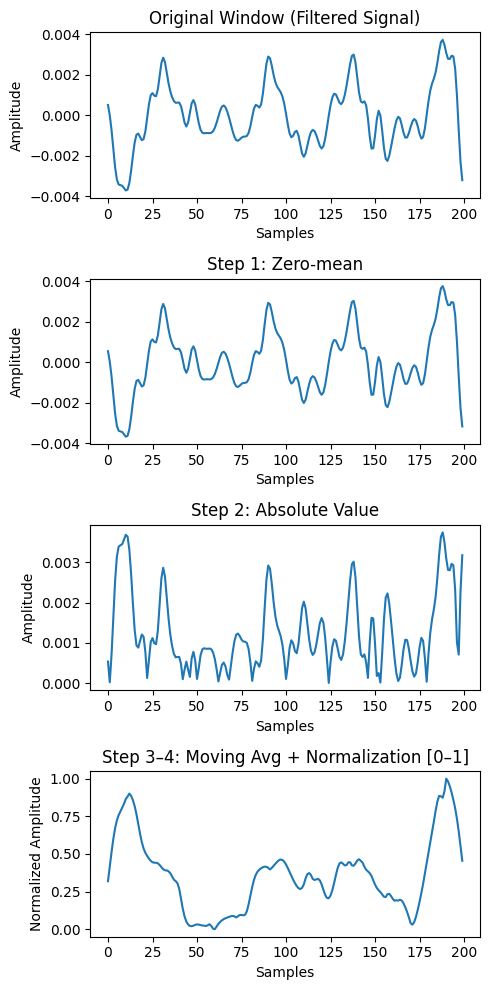

In [39]:
plt.figure(figsize=(5, 10))

# Original
plt.subplot(4, 1, 1)
plt.plot(raw_window)
plt.title('Original Window (Filtered Signal)')
plt.ylabel('Amplitude')
plt.xlabel('Samples')

# Zero-mean
plt.subplot(4, 1, 2)
plt.plot(zero_mean)
plt.title('Step 1: Zero-mean')
plt.ylabel('Amplitude')
plt.xlabel('Samples')

# Absolute value
plt.subplot(4, 1, 3)
plt.plot(abs_window)
plt.title('Step 2: Absolute Value')
plt.ylabel('Amplitude')
plt.xlabel('Samples')

# Moving average
plt.subplot(4, 1, 4)
plt.plot(normalized)
plt.title('Step 3–4: Moving Avg + Normalization [0–1]')
plt.xlabel('Sample Index')
plt.ylabel('Normalized Amplitude')
plt.xlabel('Samples')

plt.tight_layout()
plt.show()
